# "Python für ML" Kurzeinführung

In [1]:
# imports überall im Code möglich, aber die Konvention ist alle benötigten import statements
# gleich zu Beginn einer Datei zu machen

# numpy ist ein Python-Modul für Numerik, das sowohl Funktionalität als auch Effizienz bietet
import numpy as np

# pandas ist sehr gut zum Arbeiten mit tabellarischen Daten, egal ob csv, xls oder xlsx
import pandas as pd

# plotting settings
pd.plotting.register_matplotlib_converters()

# matplotlib ist ein sehr umfangreiches Modul zum Erstellen von Visualisierungen/Plots
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn erleichtert das Erstellen von oft verwendeten Plot-Typen;
# es basiert selbst auf matplotlib und man kann beides kombinieren
# eine schöne Einführung in Seaborn: https://www.kaggle.com/learn/data-visualization
import seaborn as sns

Es gibt verschiedene Zelltypen in Jupyter - Code oder Markdown. Mit Markdown kann man den Code schöner dokumentieren als durch Kommentare im Code selbst. Es sind *verschiedene* **Formatierungen** und sogar LaTeX-ähnliche mathematische Formeln möglich. Sowohl inline ($h_\theta(x) = \theta^Tx$) als auch zentriert in separaten Zeilen:

$$h_\theta(x) = \theta^Tx$$

<p><b>HTML</b> wird ebenfalls erkannt.</p>

Wir laden jetzt eine CSV-Datei mit Pandas:

## Daten laden

In [2]:
data_file_path = 'data/exam-iq.csv'
data = pd.read_csv(data_file_path)

In [3]:
data

,Pass,Hours,IQ
0,0,0.50,110
1,0,0.75,95
2,0,1.00,118
3,0,1.25,97
4,0,1.50,100
5,0,1.75,110
6,0,1.75,115
7,1,2.00,104
8,1,2.25,120
9,0,2.50,98


In [4]:
data.head()

,Pass,Hours,IQ
0,0,0.50,110
1,0,0.75,95
2,0,1.00,118
3,0,1.25,97
4,0,1.50,100


**Nützliche Shortcuts:<br>**
b - fügt eine leere Zelle unterhalb der aktuell aktiven hinzu<br>
a - fügt eine leere Zelle oberhalb der aktuell aktiven hinzu<br>
CTRL + ENTER - führt aktive Zelle aus (Mac: CMD + ENTER)<br>
SHIFT + ENTER - führt aktive Zelle aus und wechselt zur nächsten Zelle<br>
ENTER - wechselt in den Bearbeiten-Modus einer Zelle<br>
ESC - wechselt in den Ansicht-Modus einer Zelle<br>
d d - (2x d) - löscht aktive Zelle<br>
CTRL + C und CTRL + V funktionieren wie erwartet<br>

<Axes: xlabel='Hours', ylabel='IQ'>

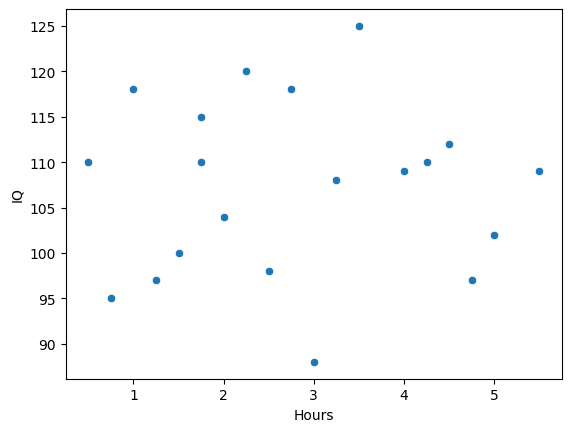

In [5]:
sns.scatterplot(x=data['Hours'], y=data['IQ'])

<Axes: xlabel='Hours', ylabel='IQ'>

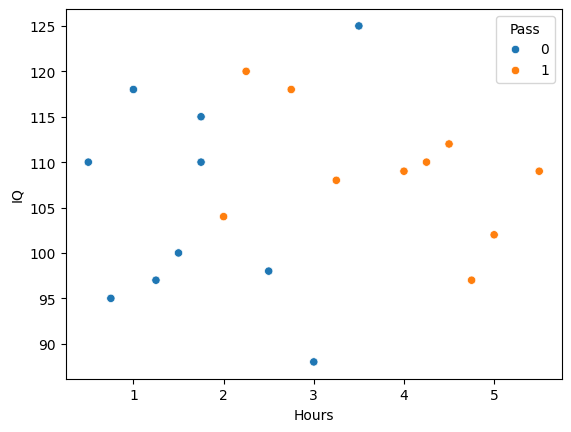

In [6]:
sns.scatterplot(x=data['Hours'], y=data['IQ'], hue=data['Pass'])

Ein anderer Datensatz...

In [7]:
melbourne_file_path = 'data/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path)

In [8]:
melbourne_data = melbourne_data.dropna(axis=0)

In [9]:
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


[(0.0, 1000.0)]

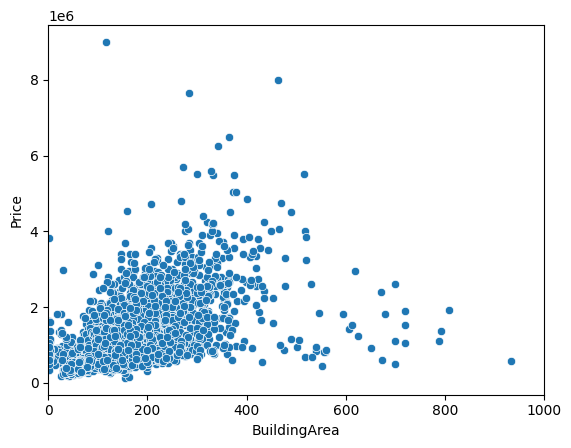

In [10]:
ax = sns.scatterplot(x=melbourne_data['BuildingArea'], y=melbourne_data['Price'])
ax.set(xlim=(0, 1000))

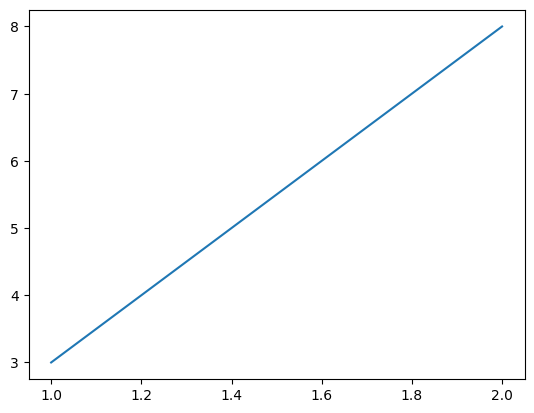

In [11]:
xplot = [1,2]
yplot = [3, 8]
ax = sns.lineplot(x=xplot, y=yplot)

Sie plotten verschiedene Dinge in eine Grafik, indem Sie seaborn mehrfach hintereinander innerhalb derselben Codezelle aufrufen. Wir plotten jetzt sowohl die Datenpunkte von oben, als auch eine Gerade:

In [12]:
len(melbourne_data)

6196

<Axes: xlabel='BuildingArea', ylabel='Price'>

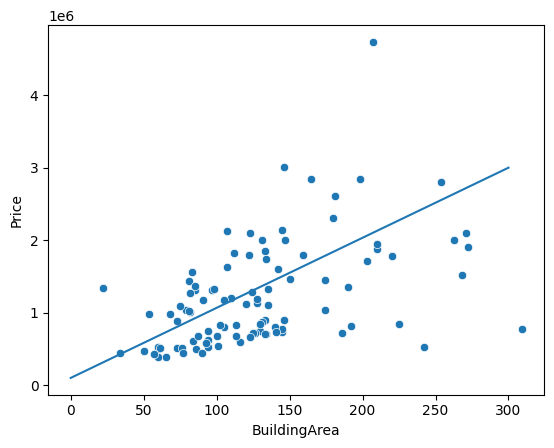

In [13]:
ax = sns.scatterplot(x=melbourne_data['BuildingArea'][:100], y=melbourne_data['Price'][:100])
xplot = [0,300]
yplot = [1e5, 3e6]
sns.lineplot(x=xplot, y=yplot)

In [14]:
l = [1,2,3]
l.append(4)
l

[1, 2, 3, 4]

So könnte man die Feature-Matrix X und den Vektor der Outputs erstellen:

In [15]:
X = []
Y = []
for i, row in melbourne_data.iterrows():
    X.append([1] + [row['BuildingArea']])
    Y.append(row['Price'])

# Für Matrixmultiplikation eiget sich numpy besser, daher wandeln wir die Python-Listen in numpy arrays um:
X = np.array(X)
Y = np.array(Y)

In [16]:
X

array([[  1.  ,  79.  ],
       [  1.  , 150.  ],
       [  1.  , 142.  ],
       ...,
       [  1.  ,  35.64],
       [  1.  ,  61.6 ],
       [  1.  , 388.5 ]])

### Slicen von numpy arrays

In [17]:
# slicen von numpy arrays
print(X[:5])
print(Y[:7])

[[  1.  79.]
 [  1. 150.]
 [  1. 142.]
 [  1. 210.]
 [  1. 107.]]
[1035000. 1465000. 1600000. 1876000. 1636000. 1097000. 1350000.]


In [18]:
# slicen von numpy arrays: Auswahl einer Spalte
print(X[:,1])

[ 79.   150.   142.   ...  35.64  61.6  388.5 ]


In [19]:
# slicen von numpy arrays: die ersten 5 Zeilen von Spalte 2 (also index 1):
print(X[:5,1])

[ 79. 150. 142. 210. 107.]


In [20]:
# slicen von numpy arrays: die ersten 5 Zeilen von Spalte 1 (also index ):
print(X[:5,0])

[1. 1. 1. 1. 1.]


### Multiplikation bei numpy arrays

Sie können numpy arrays sowohl elementweise multiplizieren als auch als Matrixmultiplikation.

In [21]:
s = 'asdas {}'
type(s)

str

In [22]:
a = 7.1234567
s = 'a: {}'.format(a)
s

'a: 7.1234567'

In [23]:
a = np.array([1,1,1])
b = np.array([1,2,3])
print('a: {}'.format(a))
print('b: {}'.format(b))

print('elementweise Operationen:')
print('a+b: {}'.format(a+b))
print('a*b: {}'.format(a*b))
print('a/b: {}'.format(a/b))

print()
print('Skalarprodukt:')
print('a@b: {}'.format(a@b))

print()
print('Matrix x Vektor:')
M = np.array([[1,3], [2,1]])
x = np.array([1,1])
print('M:\n{}'.format(M))
print('x: {}'.format(x))
print('M@x: {}'.format(M@x))

print()
print('Matrix transponieren:')
print('M.T:\n{}'.format(M.T))

a: [1 1 1]
b: [1 2 3]
elementweise Operationen:
a+b: [2 3 4]
a*b: [1 2 3]
a/b: [1.         0.5        0.33333333]

Skalarprodukt:
a@b: 6

Matrix x Vektor:
M:
[[1 3]
 [2 1]]
x: [1 1]
M@x: [4 3]

Matrix transponieren:
M.T:
[[1 2]
 [3 1]]


## Analytische Lösung der linearen Regression

`np.linalg.solve(A, b)` berechnet $w$ im linearen Gleichungssystem

$ A w = b $

$A$ - Matrix,
$w$ - Vektor (unsere unbekannten),
$b$ - Vektor.

Wir suchen die Lösung $w$ im folgenden Gleichungssystem:

$$ X^T X w = X^T Y $$

Mit $A = X^TX$ und $b = X^T Y$ berechnet `np.linalg.solve(A, b)` unsere gesuchten Paramter für die lineare Regression.

In [24]:
%%time
w_ana = np.linalg.solve(X.T @ X, X.T @ Y)
print(w_ana)

[510531.72552189   3943.64499525]
CPU times: user 1.75 ms, sys: 101 µs, total: 1.85 ms
Wall time: 662 µs
